In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [49]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
nullsum = data.isnull().sum()
if nullsum.sum() == 0:
  print('There are no Null Values')
else:
  data = data.dropna()
  print(nullsum.sum(),"Null Values are Removed!!" )

There are no Null Values


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [53]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lowerbound = Q1 - 1.5*IQR
upperbound = Q3 + 1.5*IQR

cleanedata = data[~((X<lowerbound) | (X>upperbound)).any(axis=1)]
cleanedata

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [54]:
scaler = StandardScaler()
NormalizedX = scaler.fit_transform(cleanedata[['Annual Income (k$)','Spending Score (1-100)']])

In [55]:
wcss = []
silhouttesscores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(NormalizedX)
  wcss.append(kmeans.inertia_)
  silhouttesscores.append(silhouette_score(NormalizedX,kmeans.labels_))

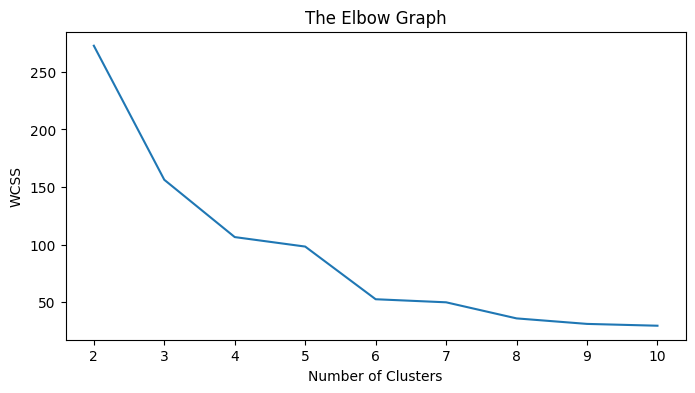

In [56]:
plt.figure(figsize=(8,4))
plt.plot(range(2,11),wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
OptimalNo = range(2,11)[np.argmax(silhouttesscores)]
print('Optimal Number of Clusters are',OptimalNo)

Optimal Number of Clusters are 6


In [58]:
kmeans = KMeans(n_clusters=OptimalNo,init='k-means++',random_state=42)
Y = kmeans.fit_predict(NormalizedX)
print(Y)

[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 5 2 5 0 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1]


<ipython-input-63-e2dff44b251e>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],palette='viridis')


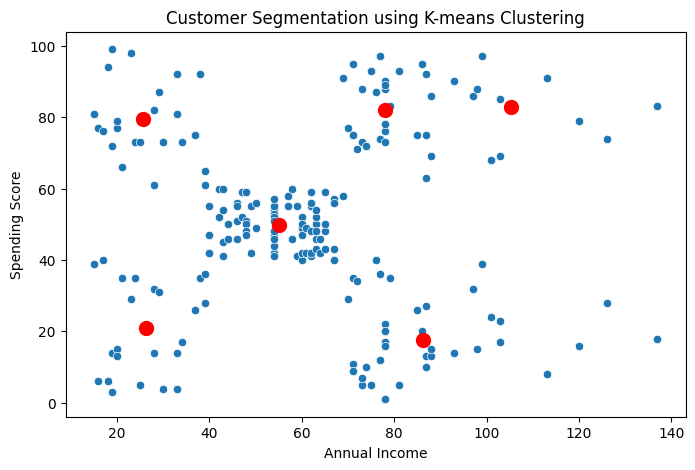

In [63]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],palette='viridis')
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,0],scaler.inverse_transform(kmeans.cluster_centers_)[:,1],s=100,c='red',label="Centroids")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using K-means Clustering')
plt.show()